In [2]:
# Import all the necessary libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import cv2
import pandas as pd
import random
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [3]:
!wget 'https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/grape.zip'

!unzip -qo grape.zip
!rm grape.zip

--2023-12-09 19:21:45--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/grape.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.211, 16.12.36.91, 52.219.158.95, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112289427 (107M) [application/x-zip-compressed]
Saving to: ‘grape.zip’

grape.zip           100%[===================>] 107.09M  26.4MB/s    in 5.0s    

2023-12-09 19:21:51 (21.2 MB/s) - ‘grape.zip’ saved [112289427/112289427]



In [4]:
train_path = os.path.join(os.getcwd(), 'data', 'train')
validation_path = os.path.join(os.getcwd(), 'data', 'validation')
os.listdir(train_path)

['yellow', 'red']

In [5]:
# Get image as numpy array
def load_image(name, path):
    img_path = os.path.join(path, name)
    img = cv2.imread(img_path)
   # img = load_img(img_path, target_size = (256, 256))
    img = img[:,:, ::-1]
    return img

# Plot numpy array
def plot_image(img, name, title):
    #image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.suptitle(title)
    #plt.title(name)

# Plot a grid of examples
def plot_grid(img_names, img_root,  title ,rows=2, cols=3):
    fig = plt.figure(figsize=(8,8))

    for i,name in enumerate(img_names):
        #print(os.path.join(img_root, name))
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        plt.axis("off")
        plot_image(img, name, title)

    plt.show()

In [ ]:
green_path = os.path.join(train_path, "green")
green_images = os.listdir(red_path)
plot_grid(green_images[-6:], green_path, title = "Green Images")

In [ ]:
yellow_path = os.path.join(train_path, "yellow")
yellow_images = os.listdir(yellow_path)
plot_grid(yellow_images[-6:], yellow_path, title = "Yellow Images")

In [8]:
train_image_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
valid_image_generator = ImageDataGenerator(
rescale = 1.0/255.0)

In [9]:
training_images = train_image_generator.flow_from_directory(train_path,
                                                            target_size = (256,256),
                                                            class_mode = 'categorical',
                                                            batch_size = 20,
                                                            classes = ['green', 'yellow']
                                                            #color_mode="grayscale"
                                                           )
validation_images = valid_image_generator.flow_from_directory(validation_path,
                                                             target_size = (256,256),
                                                             class_mode = 'categorical',
                                                             batch_size = 20,
                                                             classes = ['green', 'yellow']
                                                            #color_mode="grayscale"
                                                            )

Found 901 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
# Defining the architecture for our neural network model
model=Sequential()



model.add(Conv2D(128,(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate = 10 ** -5),
              metrics=['accuracy'])

In [12]:
# Defining Early Stopping function to monitor Validation Loss
es = EarlyStopping(monitor='val_loss', patience=5)

In [13]:
# Training the model
history = model.fit_generator(training_images,
                              steps_per_epoch = 15,
                              epochs = 50,
                              validation_data= validation_images,
                              validation_steps = 1,
                              callbacks = [es]
                                          )

<ipython-input-13-16b1b0dc275f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_images,


Epoch 1/50
15/15 [==============================] - 104s 7s/step - loss: 0.6915 - accuracy: 0.6299 - val_loss: 0.6892 - val_accuracy: 0.7500
Epoch 2/50
15/15 [==============================] - 106s 7s/step - loss: 0.6864 - accuracy: 0.7800 - val_loss: 0.6776 - val_accuracy: 0.8500
Epoch 3/50
15/15 [==============================] - 107s 7s/step - loss: 0.6804 - accuracy: 0.7900 - val_loss: 0.6778 - val_accuracy: 0.7000
Epoch 4/50
15/15 [==============================] - 107s 7s/step - loss: 0.6724 - accuracy: 0.7767 - val_loss: 0.6602 - val_accuracy: 0.8500
Epoch 5/50
15/15 [==============================] - 107s 7s/step - loss: 0.6642 - accuracy: 0.8267 - val_loss: 0.6455 - val_accuracy: 0.8000
Epoch 6/50
15/15 [==============================] - 107s 7s/step - loss: 0.6519 - accuracy: 0.8233 - val_loss: 0.6370 - val_accuracy: 0.9000
Epoch 7/50
15/15 [==============================] - 107s 7s/step - loss: 0.6332 - accuracy: 0.9000 - val_loss: 0.5925 - val_accuracy: 0.9500
Epoch 8/50
15

In [17]:
model.save('best_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Function to plot "accuracy vs epoch" graphs and "loss vs epoch" graphs for training and validation data
def plot_metrics(model_name, metric = 'accuracy'):
    if metric == 'loss':
        plt.title("Loss Values")
        plt.plot(model_name.history['loss'], label = 'train')
        plt.plot(model_name.history['val_loss'], label = 'test')
        plt.legend()
        plt.show()
    else:
        plt.title("Accuracy Values")
        plt.plot(model_name.history['accuracy'], label='train')
        plt.plot(model_name.history['val_accuracy'], label='test')
        plt.legend()
        plt.show()

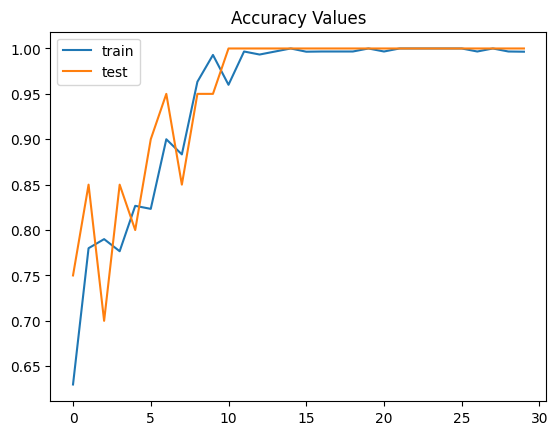

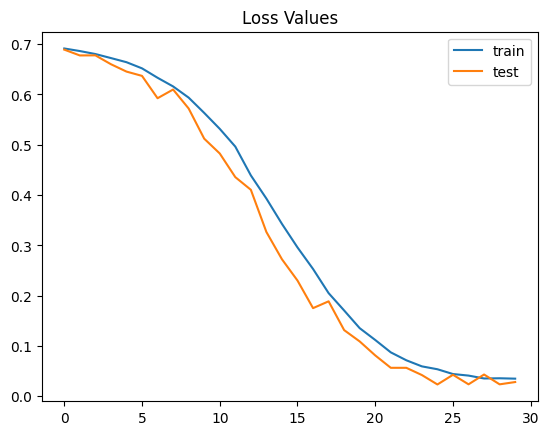

In [15]:
plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

In [16]:

prediction_loss, prediction_accuracy = model.evaluate(validation_images)
print("Prediction Accuracy: ", prediction_accuracy)

5/5 [==============================] - 9s 2s/step - loss: 0.0226 - accuracy: 1.0000
Prediction Accuracy:  1.0


In [18]:
model = load_model('best_model.h5')


In [19]:
def predict(img_path, model):
    image = load_img(img_path)
    image = image.resize((256,256))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    pred = np.argmax(model.predict(image))
    if pred == 0:
        return 'Green'
    return 'Yellow'

1/1 [==============================] - 0s 82ms/step


Text(0.5, 0.98, 'Actual Colour : Yellow')

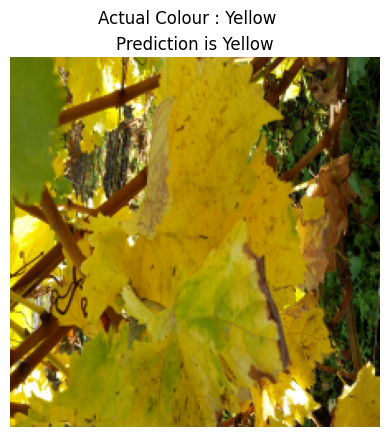

In [21]:
img_path = os.path.join (yellow_path, random.choice(os.listdir(yellow_path)))
prediction = predict(img_path, model)
pred = 'Prediction is ' + prediction
img = cv2.imread(img_path)
img = img[:,:, ::-1]
plt.imshow(img)
plt.grid(False)
plt.axis("off")
plt.title(pred)
plt.suptitle("Actual Colour : Yellow")